### Image Classification with Convolutional Neural Networks


conda install seaborn<br>
conda install pytorch::pytorch torchvision torchaudio -c pytorch<br>
conda install tqdm<br>
#### On a Mac, PyTorch may require us to revert beack to NumPy 1.xx instead the usual 2.xx. If you encounter this problem, we recommend you generate a new Python environment with the following commands in a Terminal window:
conda create --name myPyTorch python=3.13<br>
conda activate myPyTorch<br>
conda install ipykernel<br>
python -m ipykernel install --user --name=myPyTorch --display-name="myPyTorch"<br>
conda install numpy=1.26<br>
conda install matplotlib    <br>
conda install seaborn<br>
conda install pytorch::pytorch torchvision torchaudio -c pytorch<br>
conda install tqdm<br>


In [2]:
# New test if PyTorch can be loaded
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.9.1'

In [3]:
# See if the Cuda accelerator is available. There is no cuda for Macs unfortunately but that is ok.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

images you like but it is important that you do not use the same images for training and testing:<br> 
mkdir dd/training_set/paitings $\;\;\;\;\;\;$ <<<<<< copy 50 paintings inside<br>
mkdir dd/training_set/sculpture $\;\;\;\;$ <<<<<< copy 20 sculptures inside<br>
mkdir dd/test_set/paitings $\;\;\;\;\;\;\;\;\;\;\;\;$ <<<<<< copy 50 paintings inside<br>
mkdir dd/test_set/sculpture $\;\;\;\;\;\;\;\;\;\;$ <<<<<< copy 20 sculptures inside


In [1]:
# verify that you are in the correct folder with
%pwd

'/Users/nassibchaya/Desktop'

In [4]:
# list all files with
%ls 

CA_boundary2.txt
CA_coast_line_no_islands.txt
California_coastline_05_for_lab.ipynb
Figure_1.png
HW_08.ipynb
HW_10.ipynb
HW_11.ipynb
Homework Assignment 2.ipynb
IMG_0086.jpg
ML_images_22_lab_assignment_for_students copy.ipynb
__pycache__/
earthquakes48.ipynb
erosion_13_with_ocean_for_homework.ipynb
erosion_evolution.mp4
erosion_evolution_parameter_change.mp4
heat-07_1.png
homework_11_export/
hw02_pixel_graphics (1).pdf
hw04_ocean_volume (1).pdf
hw05_Mandelbrot_set.pdf
hw06_flow.pdf
hw07_heat.pdf
hw08_cooling_lava17.docx
hw08_cooling_lava17.pdf
hw09_erosion.pdf
hw11_image_classification.pdf
hw_06.ipynb
hw_seismology (1).pdf
julia_lab_assignment.ipynb
landscapeWithOcean.py
plate.txt
test_set/
training_set/
x_positions_37_assignment_for_lab+hw_part1_for_students.ipynb
x_positions_38_assignment_for_lab+hw_part2_for_students.ipynb
x_positions_39_assignment_for_lab+hw_part3_for_students.ipynb


In [5]:
# let see if Python can find your folder with
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    
image_path = "/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/"  # modify to select YOUR path
walk_through_dir(image_path)

There are 4 directories and 33 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/'.
There are 0 directories and 1 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/__pycache__'.
There are 2 directories and 1 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set'.
There are 0 directories and 201 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/buildings'.
There are 0 directories and 200 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/plants'.
There are 2 directories and 1 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set'.
There are 0 directories and 50 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/buildings'.
There are 0 directories and 40 images in '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/plants'.
There are 20 directories and 1 images in '/Users/nassibchaya/Desktop/Berkeley_Fa

In [ ]:
train_dir = "/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/"
test_dir  = "/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/"
train_dir, test_dir

('/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/',
 '/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/')

#### (3) Let's try loading images

Random image path: /Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/homework_11_export/images_for_homework_doors_8_8/Luong_Cindy_IMG_7890.jpg
Image class: images_for_homework_doors_8_8
Image height: 2016
Image width: 1512


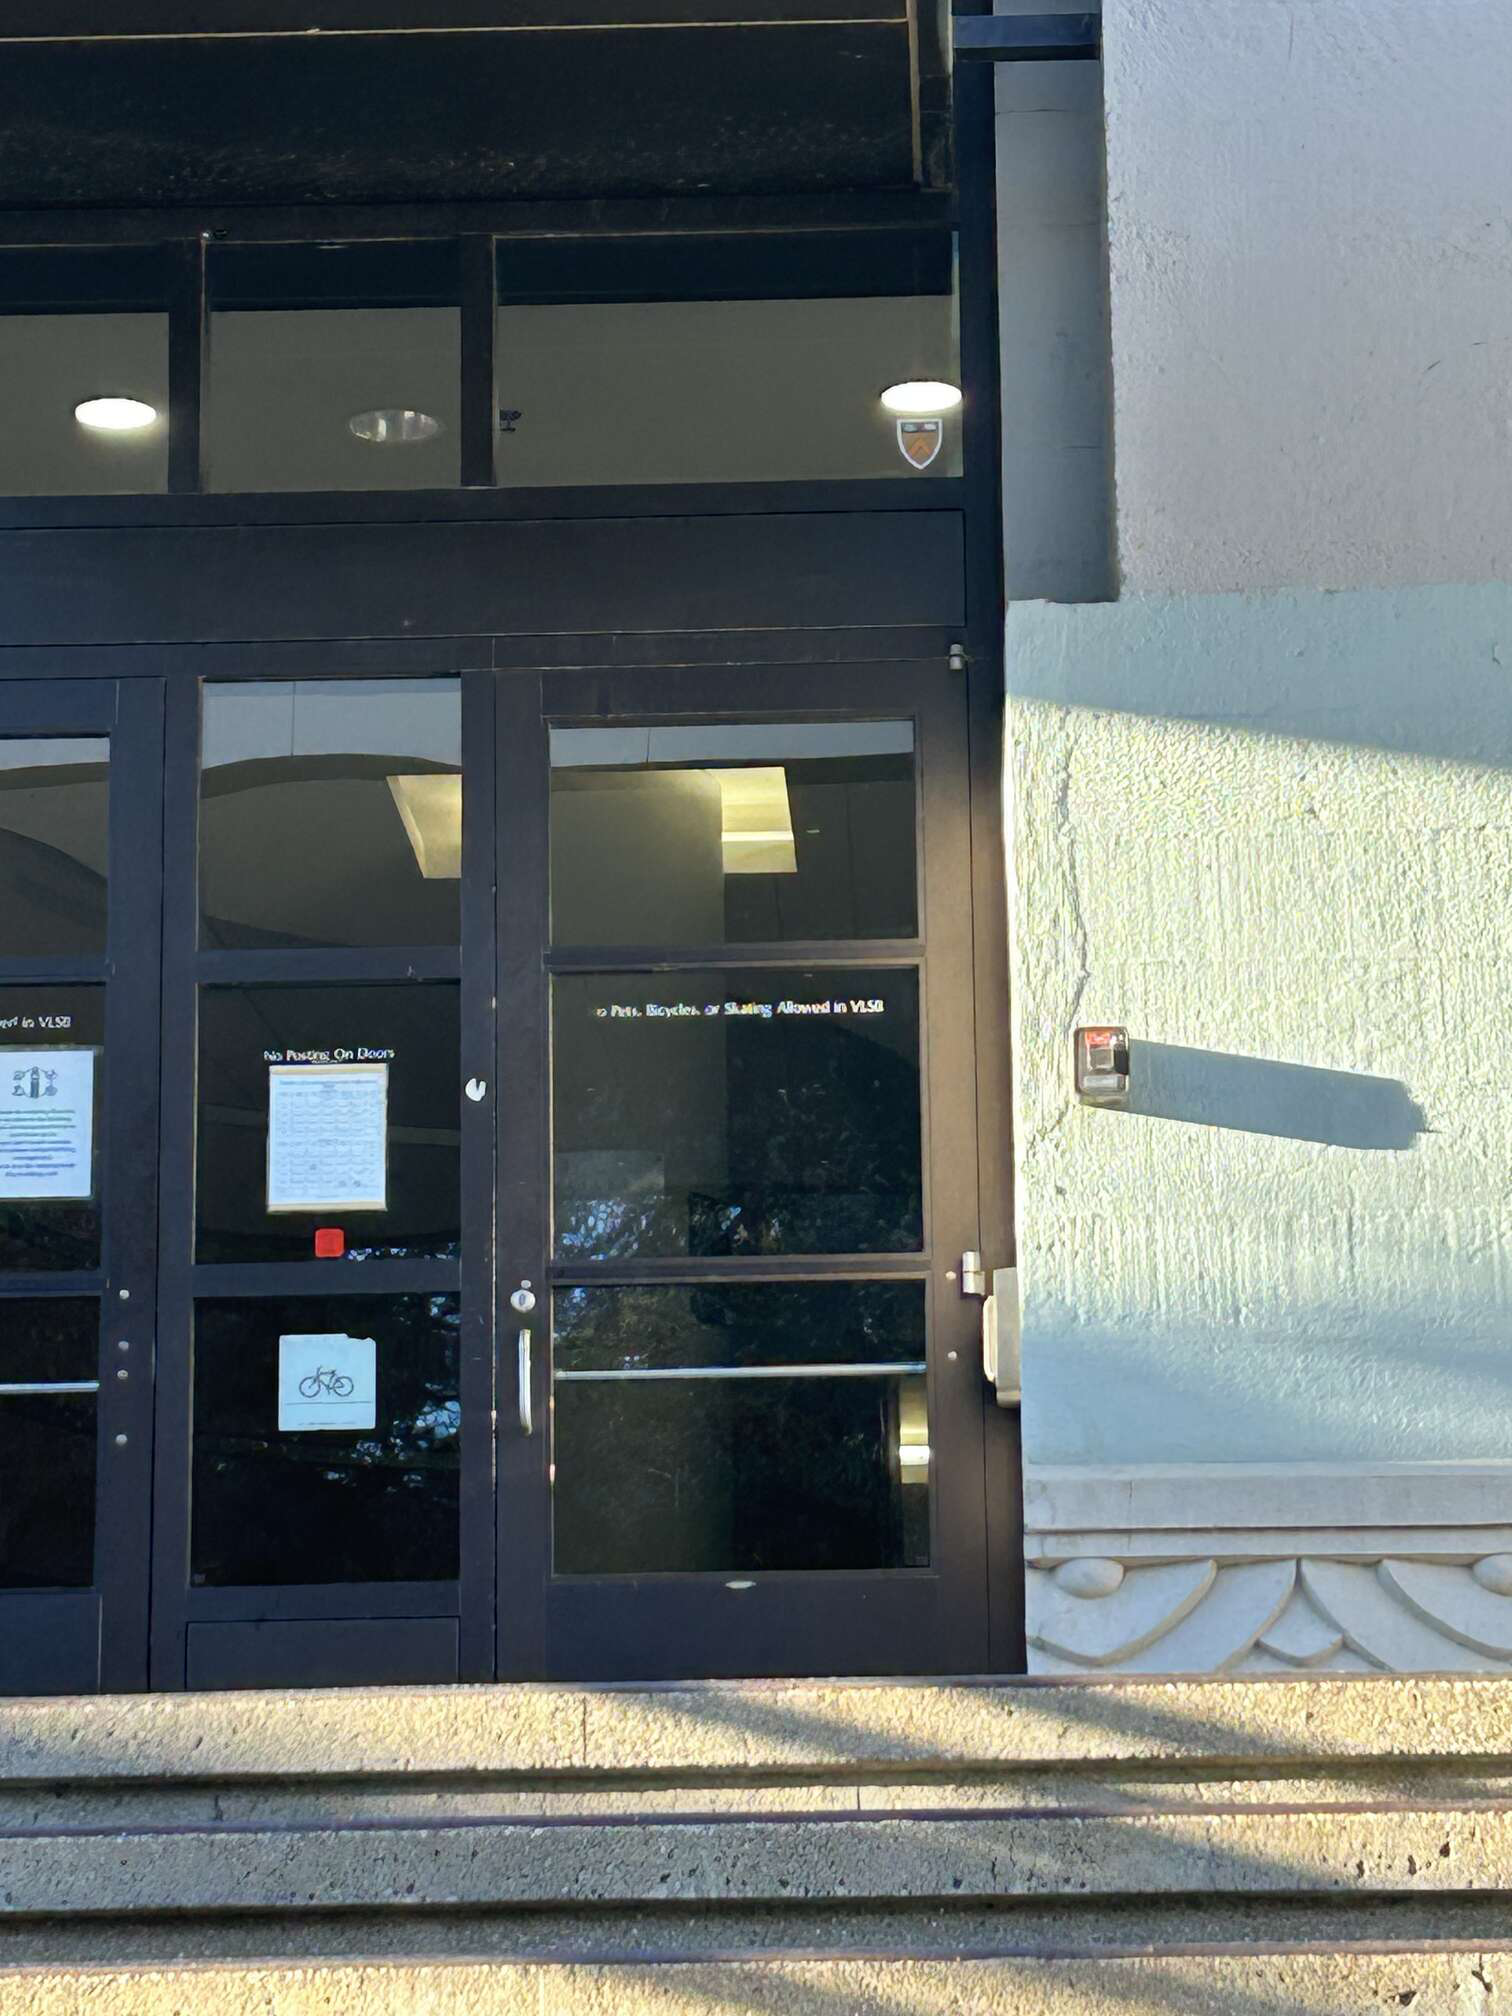

In [7]:
# select one image at random and try reading and displaying it
import random
from PIL import Image
import glob
from pathlib import Path

# Set the random number seed (Does anyone remember why we always set it to 42?)
random.seed(42) 

# 1. Get all image paths (* means "any combination")
image_path_list= glob.glob(f"{image_path}/*/*/*.jpg")

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

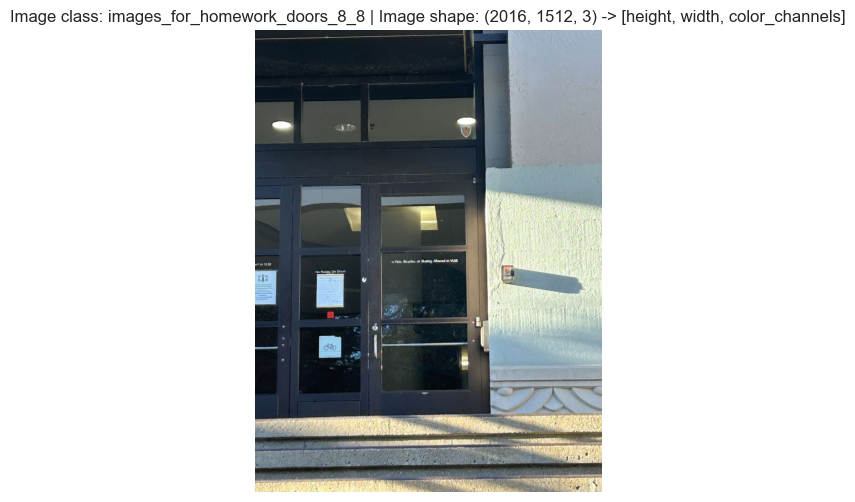

In [8]:
# display the same image again with the 'seaborn' package
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [9]:
# For the training to complete in a reasonable time, we work with rather small images.
# Larger images will not necessarily yield better results. So we recommend you leave 
# the image dimensions unchanged. So let's prepare down scaling the images
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

IMAGE_WIDTH =224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to IMAGE_SIZE xIMAGE_SIZE 
    transforms.Resize(size=IMAGE_SIZE),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

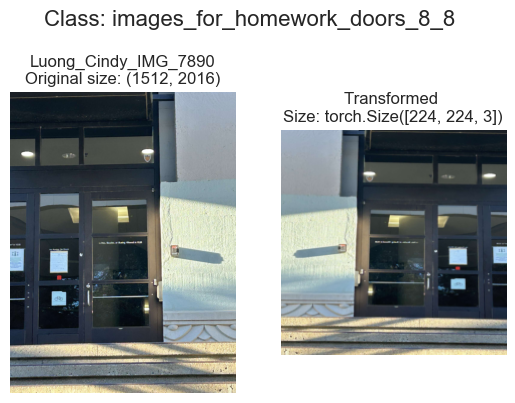

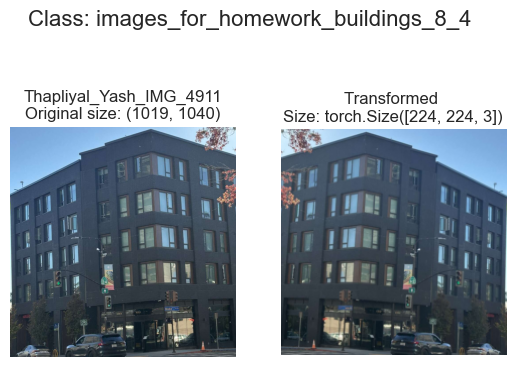

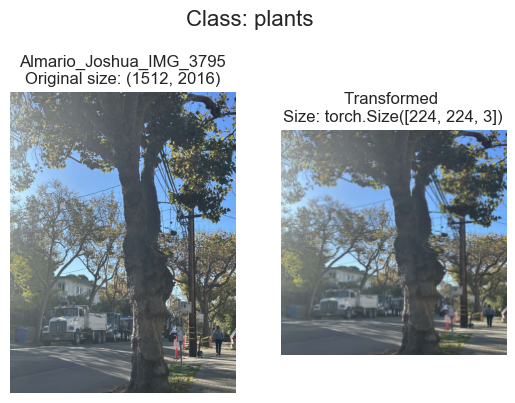

In [10]:
# practice down scaling three images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    #print(random_image_paths)
    #rint(Path(random_image_path).parent.stem)
    for image_path in random_image_paths:
        #print(image_path)
        #print(Path(image_path).stem)
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"{Path(image_path).stem}\nOriginal size: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            #fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16) # bug
            fig.suptitle(f"Class: {Path(image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [11]:
# With TorchVision, generate test and training datasets 
from torchvision import datasets

# Creating training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
#Creating test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 400
    Root location: /Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 89
    Root location: /Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
# Get class names as a list
# In this example, it should be paitings and sculptures
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data))

Class names:  ['buildings', 'plants']
Class names as a dict:  {'buildings': 0, 'plants': 1}
The lengths of the training and test sets:  400 89


In [13]:
# print the shape of the first image
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.3333, 0.3373, 0.3412,  ..., 0.2431, 0.2549, 0.2118],
         [0.3412, 0.3373, 0.3333,  ..., 0.2431, 0.2510, 0.2392],
         [0.3412, 0.3412, 0.3373,  ..., 0.2431, 0.2471, 0.2471],
         ...,
         [0.8627, 0.8549, 0.8627,  ..., 0.8784, 0.8745, 0.8745],
         [0.8667, 0.8549, 0.8549,  ..., 0.8784, 0.8745, 0.8745],
         [0.8627, 0.8275, 0.8078,  ..., 0.8745, 0.8745, 0.8745]],

        [[0.5176, 0.5216, 0.5255,  ..., 0.4235, 0.4157, 0.3098],
         [0.5255, 0.5216, 0.5176,  ..., 0.4235, 0.4196, 0.3765],
         [0.5255, 0.5255, 0.5216,  ..., 0.4235, 0.4235, 0.4196],
         ...,
         [0.8510, 0.8431, 0.8510,  ..., 0.8980, 0.8941, 0.8941],
         [0.8549, 0.8431, 0.8471,  ..., 0.8980, 0.8941, 0.8941],
         [0.8510, 0.8196, 0.8078,  ..., 0.8941, 0.8941, 0.8941]],

        [[0.8706, 0.8745, 0.8784,  ..., 0.7608, 0.7373, 0.4824],
         [0.8784, 0.8745, 0.8706,  ..., 0.7647, 0.7373, 0.6275],
         [0.8784, 0.8784, 0.8745,  ..., 0.77

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


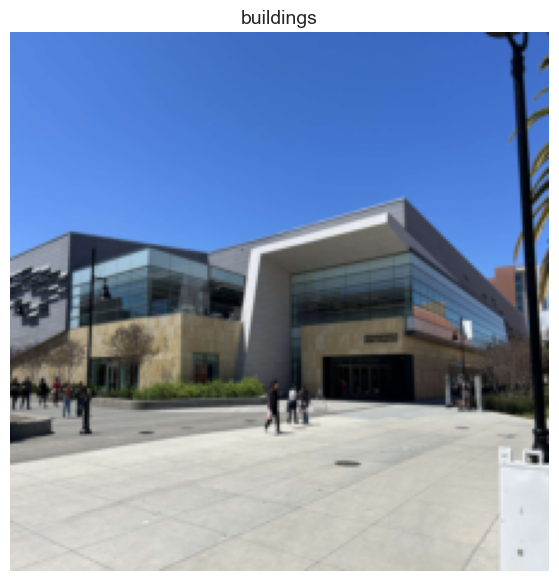

In [14]:
# Re-arrange the order of dimensions and display one image
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

#### (4) Loading the images

In [15]:
from torch.utils.data import DataLoader

# How many subprocesses will be used for data loading (higher = more)
NUM_WORKERS = os.cpu_count()

# Turn train and test Datasets into DataLoaders
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=NUM_WORKERS,
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=NUM_WORKERS, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x123561790>,
 <torch.utils.data.dataloader.DataLoader at 0x16ddf8770>)

In [16]:
# following may take a minute to run
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.  
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [17]:
# Use variables defined above, do not reset them
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Create training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])

In [18]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_augmented

(Dataset ImageFolder
     Number of datapoints: 400
     Root location: /Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/training_set/
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 89
     Root location: /Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [19]:
# Set some more parameters.
BATCH_SIZE = 32
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x302301880>,
 <torch.utils.data.dataloader.DataLoader at 0x302289010>)

In [20]:
# Creating a CNN-based image classifier.
# These elements were discuss in the machine learning lecture
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2)) 
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))
    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)

In [22]:
# the following may also take a minute
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0111, -0.0088]])

Output prediction probabilities:
tensor([[0.4994, 0.5006]])

Output prediction label:
tensor([1])

Actual label:
0


In [23]:
# Define a training function
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [24]:
# Also define a test function
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [25]:
# tqdm may print "Warning: IProgress not found." but that is ok

from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

/Applications/anaconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### (5) Now the real training begins. For 2x(50+20) images, this took between 30-200 seconds per epoch and 10-70 minutes for all 20 epochs.

In [4]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augmented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

NameError: name 'model' is not defined

In [5]:
def ClassifyImagesInFolder(folder , true_label):
    # 1. Get all image paths (* means "any combination")
    image_path_list = glob.glob(folder + "/*")
    print(image_path_list)

    numberOfImagesPerClass = np.zeros((2))

    misclassified = []
    i = 0
    for custom_image_path in image_path_list:
        i += 1
        name = os.path.basename(custom_image_path)  # name of image
        print(i, numberOfImagesPerClass, name)

        custom_image = Image.open(custom_image_path ).convert("RGB")
        custom_image_transformed = data_transform(custom_image)
        custom_image_input = custom_image_transformed.unsqueeze(0).to(device)

        model.eval()
        with torch.no_grad():
            logits = model(custom_image_input)
            custom_image_pred_label = torch.argmax(logits, dim = 1)

        label_index = int(custom_image_pred_label.cpu().item())
        numberOfImagesPerClass[label_index] += 1


        if label_index != true_label:
            misclassified.append(custom_image_path)


    print("Three misclassified images:")
    for img_path in misclassified[0:3]:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.show()

    return numberOfImagesPerClass

buildings = ClassifyImagesInFolder("/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/buildings2/", 0)
plants = ClassifyImagesInFolder("/Users/nassibchaya/Desktop/Berkeley_Fall_2025/EPS_109/HW/test_set/plants2/", 1)


buildings_fraction = buildings / np.sum(buildings)
print(buildings)
print(buildings_fraction)

plants_fraction = plants / np.sum(plants)
print(plants)
print(plants_fraction)


NameError: name 'glob' is not defined

[280. 120.]
[0.7 0.3]
[ 26. 374.]
[0.065 0.935]

#for doors vs windows

[377.  19.]
[0.9520202 0.0479798]
[ 18. 377.]
[0.04556962 0.95443038]

#for cars vs bikes

[392.   8.]
[0.98 0.02]
[ 46. 354.]
[0.115 0.885]

#for buildings and plants

When comparign the different classifciations, the pattern that emerges is that some categories are easier to train on the CNN than others. Doors and windows being one the easiet tasks, the model converges quickly with smooth curves and both classes demonstating high confidence 0.95 and 0.05. This indicates that the visual difference between the two categories are consistent and allowing the CNN to differenciate the images accurately.

Cars and bikes are more diffuclut to obtain a highger trainign accurarcy since the test accuraccy fluctuates and the final fraction shows that while the model predicts correctly. There are erros that occur.

Lastly buidlings and plants had the most most difficult process of identifying the correct images with the fraction being 0.7 and 0.3. This can be identified that both images contain irregular structures which make them less cleanly sperable.